# If you're happy and I know it you can enter my House 


In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [5]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [8]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


Image shape : (64, 64, 3)


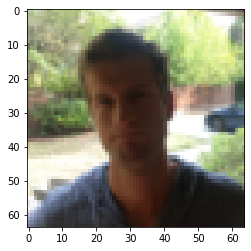

In [9]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

In [ ]:
"""
BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    **kwargs
)
"""

In [12]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3),activation="relu",padding="same",input_shape=(64,64,3)),
    BatchNormalization(axis=1),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    
    Conv2D(32, kernel_size=(3, 3),activation="relu",padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    
    Conv2D(64, kernel_size=(3, 3),activation="relu",padding="same"),
    
    Flatten(),
    Dropout(0.1),
    Dense(128,activation="relu"),
    Dense(1,activation="sigmoid")
])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
________________________________________________

In [13]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [16]:
history_model = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs= 10, 
                          batch_size=128)

Instructions for updating:
Use tf.cast instead.
Train on 600 samples, validate on 150 samples
Epoch 1/10
600/600 [==============================] - 4s 7ms/step - loss: 3.6275 - accuracy: 0.4867 - val_loss: 0.6854 - val_accuracy: 0.5600
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.9178 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.4400
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.6833 - accuracy: 0.5433 - val_loss: 0.6884 - val_accuracy: 0.6067
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.6256 - accuracy: 0.7467 - val_loss: 0.6847 - val_accuracy: 0.5200
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.5473 - accuracy: 0.7450 - val_loss: 0.6586 - val_accuracy: 0.6867
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.4930 - accuracy: 0.7533 - val_loss: 0.6397 - val_accuracy: 0.6933
Epoch 7/10
600/600 [==============================] - 

# Evaluate / Test

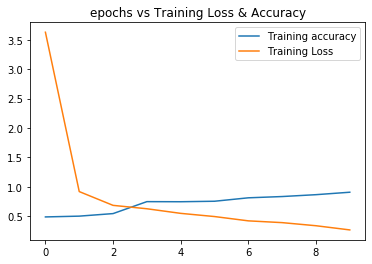

In [18]:
train_accuracy = history_model.history["accuracy"]
train_loss = history_model.history["loss"]

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss & Accuracy')
plt.legend()

Evaluate Test set

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2, batch_size=1)

print('\n ==> Test Accuracy : ',test_accuracy )
print('\n ==> Test Loss:', test_loss)


 ==> Test Accuracy :  0.8600000143051147

 ==> Test Loss: 0.5645031058788299


Confusion Matrix

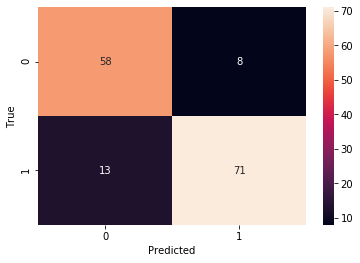

In [26]:
Y_pred = model.predict(X_test)
Y_pred=(Y_pred > 0.5)
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()